In [2]:
import time
import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as mpatches
import seaborn as sns
import warnings
import xgboost as xgb
from scipy import interp

from collections import Counter
from sklearn import metrics, preprocessing, linear_model
from sklearn.metrics import (
    roc_auc_score, roc_curve, precision_score, recall_score,
    f1_score, accuracy_score, classification_report
)
from sklearn.model_selection import (
    train_test_split, KFold, GridSearchCV, StratifiedKFold
)
from sklearn.manifold import TSNE
from sklearn.preprocessing import PowerTransformer, RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.metrics import classification_report_imbalanced
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler

warnings.filterwarnings('ignore')

In [3]:
#pip install imblearn

In [4]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Drop the 'Time' column from the DataFrame
df = df.drop("Time", axis=1)
df.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# Assign the 'Class' column as the target variable y
y = df["Class"]

# Create the feature matrix X by dropping the 'Class' column
X = df.drop("Class", axis=1)

# Print the shapes of y and X
print("Shape of y:", y.shape)
print("Shape of X:", X.shape)


Shape of y: (284807,)
Shape of X: (284807, 29)


In [7]:
# Splitting the data into 80:20 train test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (227845, 29)
Shape of X_test: (56962, 29)
Shape of y_train: (227845,)
Shape of y_test: (56962,)


In [8]:
print("Fraudulent Count for Full data:", np.sum(y))
print("Fraudulent Count for Train data:", np.sum(y_train))
print("Fraudulent Count for Test data:", np.sum(y_test))


Fraudulent Count for Full data: 492
Fraudulent Count for Train data: 394
Fraudulent Count for Test data: 98


In [9]:
X_test_saved = X_test.copy()
y_test_saved = y_test.copy()
print("Testing set saved for evaluation.")


Testing set saved for evaluation.


In [10]:
# Initialize the RobustScaler
scaler = RobustScaler()

# Scaling the "Amount" feature in the training data
X_train[["Amount"]] = scaler.fit_transform(X_train[["Amount"]])

# Scaling the "Amount" feature in the test data
X_test[["Amount"]] = scaler.transform(X_test[["Amount"]])

# Calculate skewness of features
var = X_train.columns
skewness_list = []
for col in var:
    skewness_list.append(X_train[col].skew())

# Create a DataFrame to store skewness values
skewness_df = pd.DataFrame({"Features": var, "Skewness": skewness_list})
skewness_df.set_index("Features", inplace=True)
skewness_df

# Identify skewed features
skewed_features = skewness_df[(skewness_df["Skewness"] > 1) | (skewness_df["Skewness"] < -1)].index
skewed_features.tolist()

# Instantiate the PowerTransformer
pt = preprocessing.PowerTransformer(method='yeo-johnson', copy=True)

# Fit and transform the training data
X_train_pt = pt.fit_transform(X_train)
y_train_pt = y_train

# Transform the test data using the same transformer
X_test_pt = pt.transform(X_test)
y_test_pt = y_test


In [11]:
# Conducting cross-validation for both X_train and y_train datasets.
# Initialize a StratifiedKFold cross-validator for performing cross-validation.

num_splits = 3
random_state = None
shuffle_data = False  # The shuffling of data is disabled by setting shuffle to False in order to maintain consistent results during cross-validation.

skf = StratifiedKFold(n_splits=num_splits, random_state=random_state, shuffle=shuffle_data)


:::: Processing Logistic Regression Classifier ::::
Evaluating model with C = 0.1 using L2 penalty...
Training on indices: [ 75936  75937  75938 ... 227842 227843 227844] | Validating on indices: [    0     1     2 ... 83545 84117 84974]
Completed in 0.78 seconds
Training on indices: [     0      1      2 ... 227842 227843 227844] | Validating on indices: [ 75936  75937  75938 ... 153006 153116 153683]
Completed in 0.93 seconds
Training on indices: [     0      1      2 ... 153006 153116 153683] | Validating on indices: [151894 151895 151896 ... 227842 227843 227844]
Completed in 0.74 seconds
Validation AUC: 0.9798
Avg Precision: 0.8855
Avg Recall: 0.6296
Avg F1 Score: 0.7341
Evaluating model with C = 0.5 using L2 penalty...
Training on indices: [ 75936  75937  75938 ... 227842 227843 227844] | Validating on indices: [    0     1     2 ... 83545 84117 84974]
Completed in 0.84 seconds
Training on indices: [     0      1      2 ... 227842 227843 227844] | Validating on indices: [ 75936  

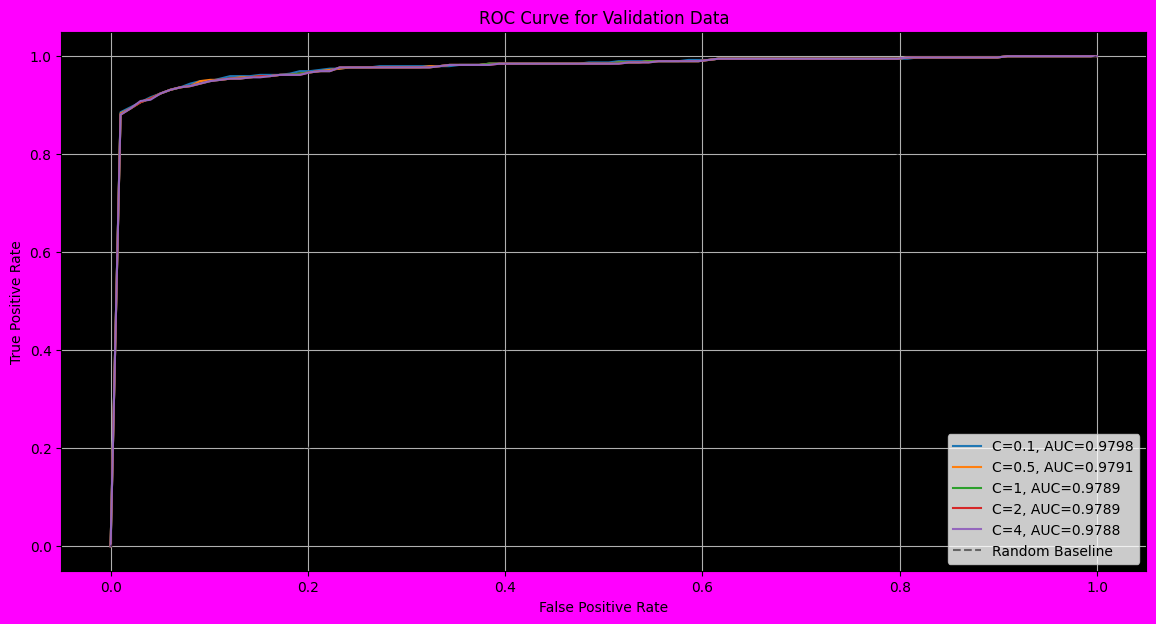

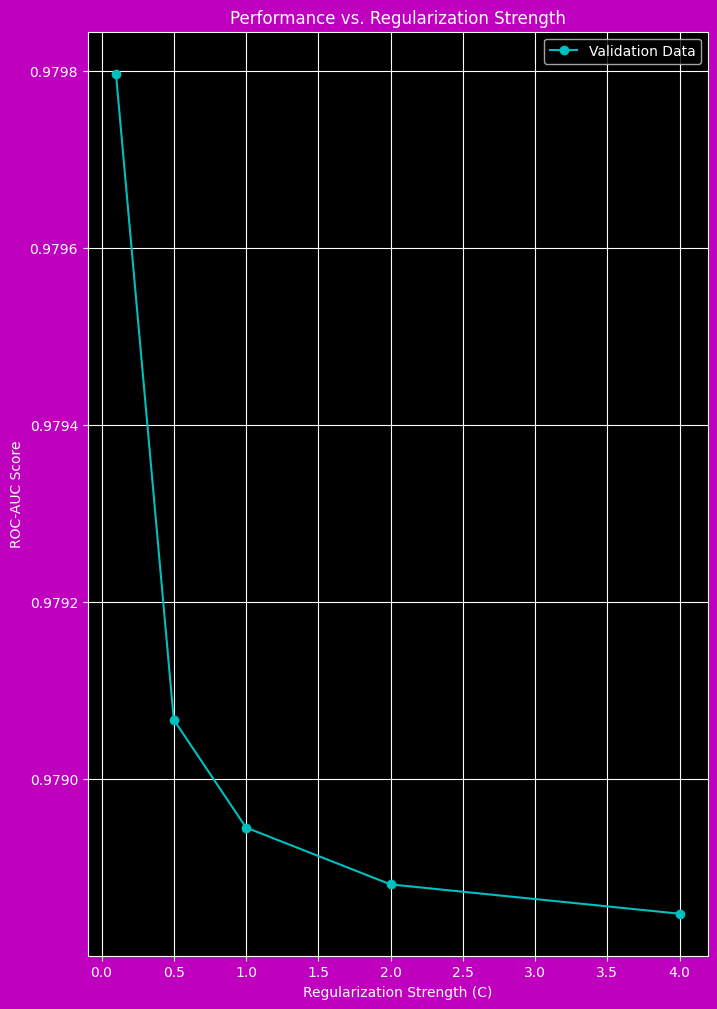

:::: Highlighting Best Outcomes & Parameters ::::
ROC-AUC scores for all regularization strengths: [0.9797969874466093, 0.9790668817700007, 0.9789450373956186, 0.9788807735548114, 0.9788476359347289]
Best Regularization Strength: 0.1
Top ROC-AUC: 0.9798
Precision at this strength: 0.8855
Recall at this strength: 0.6296
F1 Score at this strength: 0.7341


In [15]:
print("="*120)

print(":::: Processing Logistic Regression Classifier ::::")

# Define regularization strengths for the model
regularization_strengths = [0.1, 0.5, 1, 2, 4]

# Collect performance metrics for further analysis
roc_auc_collection = []
precision_collection = []
recall_collection = []
f1_collection = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(14, 7), facecolor='fuchsia')
ax2.set_facecolor('black')

# Cycle through each regularization strength to assess model performance
for strength in regularization_strengths:
    print(f"Evaluating model with C = {strength} using L2 penalty...")
    scores, precisions, recalls, f1s, fprs, tprs = [], [], [], [], [], []

    for train_idx, val_idx in skf.split(X_train_pt, y_train_pt):
        start_time = time.time()
        print(f"Training on indices: {train_idx} | Validating on indices: {val_idx}")
        X_train_fold, X_val_fold = X_train_pt[train_idx], X_train_pt[val_idx]
        y_train_fold, y_val_fold = y_train_pt.iloc[train_idx], y_train_pt.iloc[val_idx]

        logistic_regressor = linear_model.LogisticRegression(penalty='l2', C=strength)
        logistic_regressor.fit(X_train_fold, y_train_fold)

        y_predicted_probs = logistic_regressor.predict_proba(X_val_fold)
        score = roc_auc_score(y_true=y_val_fold, y_score=y_predicted_probs[:, 1])
        scores.append(score)

        y_predicted = (y_predicted_probs[:, 1] >= 0.5).astype(int)
        precisions.append(precision_score(y_val_fold, y_predicted))
        recalls.append(recall_score(y_val_fold, y_predicted))
        f1s.append(f1_score(y_val_fold, y_predicted))

        fpr, tpr, _ = roc_curve(y_true=y_val_fold, y_score=y_predicted_probs[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        fprs.append(fpr)

        elapsed = time.time() - start_time
        print(f"Completed in {elapsed:.2f} seconds")

    # Compute average performance metrics
    avg_auc = np.mean(scores)
    roc_auc_collection.append(avg_auc)
    precision_collection.append(np.mean(precisions))
    recall_collection.append(np.mean(recalls))
    f1_collection.append(np.mean(f1s))

    print(f"Validation AUC: {avg_auc:.4f}")
    print(f"Avg Precision: {np.mean(precisions):.4f}")
    print(f"Avg Recall: {np.mean(recalls):.4f}")
    print(f"Avg F1 Score: {np.mean(f1s):.4f}")
    print("="*120)

    ax2.plot(mean_fpr, np.mean(tprs, axis=0), label=f'C={strength}, AUC={avg_auc:.4f}')

print(":::: Logistic Regression Analysis Complete ::::")
print("="*120)

# Finalize the ROC curve plot
ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random Baseline', alpha=0.5)
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve for Validation Data')
ax2.legend(loc="lower right")
ax2.grid(True)
plt.show()

print("="*120)

# Plotting ROC-AUC vs. Regularization Strength
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')
    plt.plot(regularization_strengths, roc_auc_collection, 'co-')
    plt.xlabel('Regularization Strength (C)')
    plt.ylabel('ROC-AUC Score')
    plt.title('Performance vs. Regularization Strength')
    plt.legend(['Validation Data'], loc='upper right')
    plt.grid()
    plt.show()

print("="*120)

# Display the best results
print(":::: Highlighting Best Outcomes & Parameters ::::")
print(f"ROC-AUC scores for all regularization strengths: {roc_auc_collection}")

top_idx = np.argmax(roc_auc_collection)
top_strength = regularization_strengths[top_idx]
print(f"Best Regularization Strength: {top_strength}")
print(f"Top ROC-AUC: {roc_auc_collection[top_idx]:.4f}")
print(f"Precision at this strength: {precision_collection[top_idx]:.4f}")
print(f"Recall at this strength: {recall_collection[top_idx]:.4f}")
print(f"F1 Score at this strength: {f1_collection[top_idx]:.4f}")

print("="*120)


In [16]:
# Define hyperparameters for logistic regression to be used in GridSearchCV
hyperparameters = {"C": [0.01, 0.1, 0.5], 'penalty': ['l1', 'l2']}

# Create a logistic regression model instance
logistic_regressor = linear_model.LogisticRegression()

clock_start = time.time()

# Set up GridSearchCV with Stratified K-fold cross-validation
grid_search_setup = GridSearchCV(
    logistic_regressor,
    param_grid=hyperparameters,
    scoring='roc_auc',
    cv=skf,
    n_jobs=-1,
    verbose=1,
    pre_dispatch=6,
    return_train_score=True
) 

# Apply GridSearchCV to the dataset to find the best hyperparameters
grid_search_setup.fit(X_train_pt, y_train_pt)

clock_end = time.time()

# Report the duration of grid search 
print(f"Grid search completed in: {clock_end - clock_start:.2f} seconds")

# Highlight the top ROC AUC score achieved during the search
print(f"Optimal ROC AUC score: {grid_search_setup.best_score_:.4f}")

# Indicate the hyperparameters that led to the best score
print(f"Optimal parameter set: {grid_search_setup.best_params_}")


Fitting 3 folds for each of 6 candidates, totalling 18 fits
Grid search completed in: 5.73 seconds
Optimal ROC AUC score: 0.9812
Optimal parameter set: {'C': 0.01, 'penalty': 'l2'}


In [18]:
evaluation_data = grid_search_setup.cv_results_

# Showcase average test scores associated with each hyperparameter set
print("Average test scores for hyperparameter combinations:")
for score, parameter_combination in zip(evaluation_data["mean_test_score"], evaluation_data["params"]):
    print(f"{parameter_combination} yielded an average score of {score:.4f}")

# Indicate the order of hyperparameter combinations based on their performance
print("\nHyperparameter combinations ranked by performance:")
for position, parameter_combination in enumerate(evaluation_data["params"]):
    print(f"Ranking {position+1}: {parameter_combination}")

# Highlight the score consistency for each hyperparameter set
print("\nScore consistency for hyperparameter combinations:")
for deviation, parameter_combination in zip(evaluation_data["std_test_score"], evaluation_data["params"]):
    print(f"{parameter_combination} had a score standard deviation of {deviation:.4f}")


Average test scores for hyperparameter combinations:
{'C': 0.01, 'penalty': 'l1'} yielded an average score of nan
{'C': 0.01, 'penalty': 'l2'} yielded an average score of 0.9812
{'C': 0.1, 'penalty': 'l1'} yielded an average score of nan
{'C': 0.1, 'penalty': 'l2'} yielded an average score of 0.9798
{'C': 0.5, 'penalty': 'l1'} yielded an average score of nan
{'C': 0.5, 'penalty': 'l2'} yielded an average score of 0.9791

Hyperparameter combinations ranked by performance:
Ranking 1: {'C': 0.01, 'penalty': 'l1'}
Ranking 2: {'C': 0.01, 'penalty': 'l2'}
Ranking 3: {'C': 0.1, 'penalty': 'l1'}
Ranking 4: {'C': 0.1, 'penalty': 'l2'}
Ranking 5: {'C': 0.5, 'penalty': 'l1'}
Ranking 6: {'C': 0.5, 'penalty': 'l2'}

Score consistency for hyperparameter combinations:
{'C': 0.01, 'penalty': 'l1'} had a score standard deviation of nan
{'C': 0.01, 'penalty': 'l2'} had a score standard deviation of 0.0077
{'C': 0.1, 'penalty': 'l1'} had a score standard deviation of nan
{'C': 0.1, 'penalty': 'l2'} had a

In [23]:
# Initialize the SMOTE resampler with a given random state
smote = over_sampling.SMOTE(random_state=0)

# Apply the resampling to the training data
X_smote_train_pt, y_smote_train_pt = smote.fit_resample(X_train_pt, y_train_pt)

Running Logistic Regression Classifier...
Regularization Strength (C) = 0.1, Using L2 Penalty
Training on indices: [ 75936  75937  75938 ... 454899 454900 454901], Validating on indices: [     0      1      2 ... 303265 303266 303267]
Time taken for this iteration: 1.87 seconds
Training on indices: [     0      1      2 ... 454899 454900 454901], Validating on indices: [ 75936  75937  75938 ... 379082 379083 379084]
Time taken for this iteration: 1.85 seconds
Training on indices: [     0      1      2 ... 379082 379083 379084], Validating on indices: [151894 151895 151896 ... 454899 454900 454901]
Time taken for this iteration: 1.86 seconds
Validation AUC: 0.9907
Average Precision (Val): 0.9702
Average Recall (Val): 0.9290
Average F1 Score (Val): 0.9491
----------------------------------------------------------------------------------------------------
Regularization Strength (C) = 0.5, Using L2 Penalty
Training on indices: [ 75936  75937  75938 ... 454899 454900 454901], Validating on

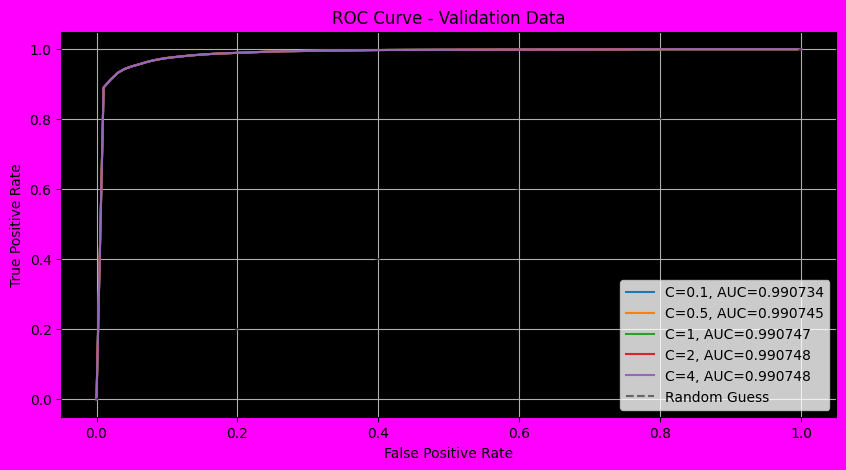

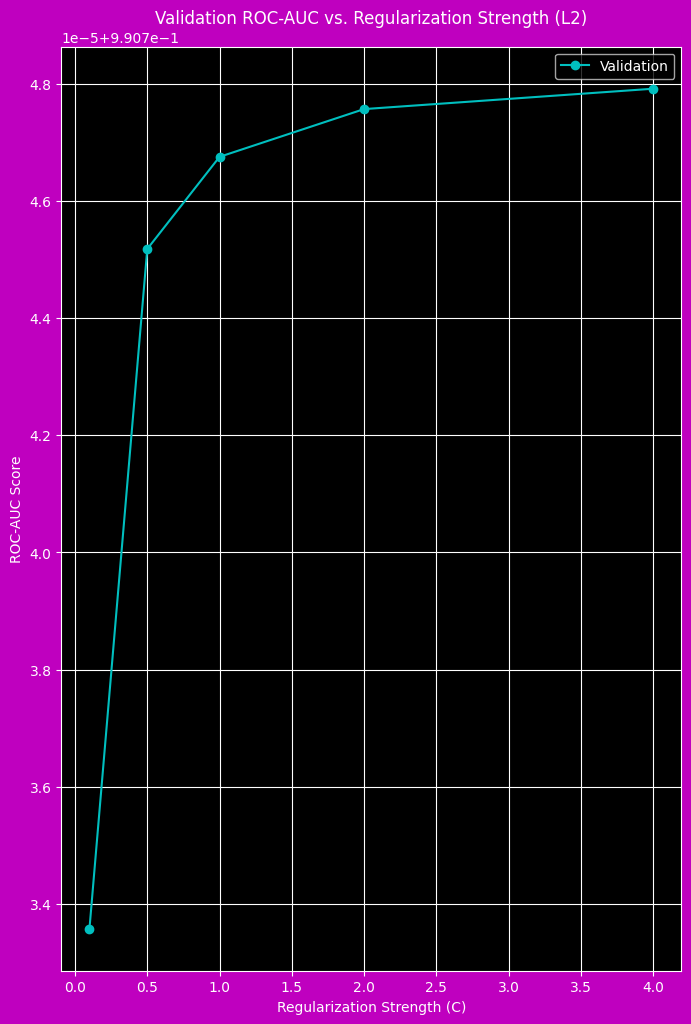

Best Results and Chosen Hyperparameters:
Validation AUC Scores for all C values: [0.9907335768983577, 0.9907451784368858, 0.9907467507503931, 0.9907475658726477, 0.99074791351665]
Optimal C: 4
Best AUC: 0.9907
Precision at Best C: 0.9701
Recall at Best C: 0.9292
F1 Score at Best C: 0.9492
----------------------------------------------------------------------------------------------------
Hyperparameter Tuning Completed!
----------------------------------------------------------------------------------------------------


In [24]:
print("="*100)

print("Running Logistic Regression Classifier...")

# Set regularization strengths
regularization_strengths = [0.1, 0.5, 1, 2, 4]

# Lists to collect performance metrics
auc_scores_val = []
avg_precision_val = []
avg_recall_val = []
avg_f1_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(10, 5), facecolor='fuchsia')
ax2.set_facecolor('black')

# Iterate over regularization strengths
for strength in regularization_strengths:
    print(f"Regularization Strength (C) = {strength}, Using L2 Penalty")
    scores_val, precision_vals, recall_vals, f1_vals, fprs_vals, tprs_vals = [], [], [], [], [], []

    # Cross-validation loop
    for train_idx, val_idx in skf.split(X_smote_train_pt, y_smote_train_pt):
        print(f"Training on indices: {train_idx}, Validating on indices: {val_idx}")
        start = time.time()

        X_train_fold, X_val_fold = X_smote_train_pt[train_idx], X_smote_train_pt[val_idx]
        y_train_fold, y_val_fold = y_smote_train_pt.iloc[train_idx], y_smote_train_pt.iloc[val_idx]

        model = linear_model.LogisticRegression(penalty='l2', C=strength)
        model.fit(X_train_fold, y_train_fold)

        y_predicted_probs = model.predict_proba(X_val_fold)
        score = roc_auc_score(y_true=y_val_fold, y_score=y_predicted_probs[:, 1])
        scores_val.append(score)

        y_predicted = (y_predicted_probs[:, 1] >= 0.5).astype(int)
        precision_vals.append(precision_score(y_val_fold, y_predicted))
        recall_vals.append(recall_score(y_val_fold, y_predicted))
        f1_vals.append(f1_score(y_val_fold, y_predicted))

        fpr, tpr, _ = roc_curve(y_true=y_val_fold, y_score=y_predicted_probs[:, 1])
        tprs_vals.append(interp(mean_fpr, fpr, tpr))
        tprs_vals[-1][0] = 0.0
        fprs_vals.append(fpr)

        print(f"Time taken for this iteration: {time.time() - start:.2f} seconds")

    # Compute average performance metrics
    avg_auc_val = np.mean(scores_val)
    auc_scores_val.append(avg_auc_val)
    avg_precision_val.append(np.mean(precision_vals))
    avg_recall_val.append(np.mean(recall_vals))
    avg_f1_val.append(np.mean(f1_vals))

    print(f"Validation AUC: {avg_auc_val:.4f}")
    print(f"Average Precision (Val): {np.mean(precision_vals):.4f}")
    print(f"Average Recall (Val): {np.mean(recall_vals):.4f}")
    print(f"Average F1 Score (Val): {np.mean(f1_vals):.4f}")

    print("-"*100)

    # Plot AUC curve for current regularization strength
    ax2.plot(mean_fpr, np.mean(tprs_vals, axis=0), label=f'C={strength}, AUC={avg_auc_val:.6f}')

print("Logistic Regression Completed Successfully!")
print("-"*100)
print("Plotting the ROC-AUC Curve...")
print("="*100)

# Plotting details
ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random Guess', alpha=0.5)
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - Validation Data')
ax2.legend(loc="lower right")
ax2.grid(True)
plt.show()

print("="*100)

# Plotting ROC-AUC vs. Regularization Strength
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')
    plt.plot(regularization_strengths, auc_scores_val, 'co-')
    plt.xlabel('Regularization Strength (C)')
    plt.ylabel('ROC-AUC Score')
    plt.title('Validation ROC-AUC vs. Regularization Strength (L2)')
    plt.legend(['Validation'], loc='upper right')
    plt.grid()
    plt.show()

print("="*100)
print("Best Results and Chosen Hyperparameters:")
print(f"Validation AUC Scores for all C values: {auc_scores_val}")
best_idx = np.argmax(auc_scores_val)
print(f"Optimal C: {regularization_strengths[best_idx]}")
print(f"Best AUC: {auc_scores_val[best_idx]:.4f}")
print(f"Precision at Best C: {avg_precision_val[best_idx]:.4f}")
print(f"Recall at Best C: {avg_recall_val[best_idx]:.4f}")
print(f"F1 Score at Best C: {avg_f1_val[best_idx]:.4f}")

print("-"*100)
print("Hyperparameter Tuning Completed!")
print("-"*100)
print("="*100)


In [25]:
# Set up logistic regression hyperparameters for tuning with Stratified K-fold
hyperparameters = {"C": [0.01, 0.1, 0.5, 1, 2, 4], 'penalty': ['l1', 'l2']}

# Instantiate logistic regression model
logistic_model = linear_model.LogisticRegression()

clock_start = time.time()

# Configure GridSearchCV for hyperparameter tuning with stratified cross-validation
grid_search = GridSearchCV(
    logistic_model,
    param_grid=hyperparameters, 
    scoring='roc_auc', 
    cv=skf, 
    n_jobs=-1,  # utilize all available CPU cores
    verbose=1,
    return_train_score=True
) 

# Apply GridSearchCV to the oversampled training dataset
grid_search.fit(X_smote_train_pt, y_smote_train_pt)

clock_end = time.time()

# Display the time required for the grid search
print(f"Grid search completed in: {clock_end - clock_start:.2f} seconds")

# Showcase the best ROC AUC score achieved
print(f"Top ROC AUC score: {grid_search.best_score_:.4f}")

# Detail the hyperparameters that led to the best score
print(f"Optimal hyperparameters: {grid_search.best_params_}")


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Grid search completed in: 11.01 seconds
Top ROC AUC score: 0.9908
Optimal hyperparameters: {'C': 4, 'penalty': 'l2'}


In [26]:
evaluation_results = grid_search.cv_results_

# Display average scores for different parameter sets
print("Average scores for different parameter combinations:")
for score, parameter_set in zip(evaluation_results["mean_test_score"], evaluation_results["params"]):
    print(parameter_set, f"Score: {score:.4f}")

# Highlight the order of preference for parameter combinations
print("\nOrder of preference for parameter combinations:")
for position, parameter_set in enumerate(evaluation_results["params"]):
    print(f"Position {position+1}: {parameter_set}")

# Show variability in scores across different parameter sets
print("\nVariability in scores for parameter combinations:")
for deviation, parameter_set in zip(evaluation_results["std_test_score"], evaluation_results["params"]):
    print(parameter_set, f"Deviation: {deviation:.4f}")


Average scores for different parameter combinations:
{'C': 0.01, 'penalty': 'l1'} Score: nan
{'C': 0.01, 'penalty': 'l2'} Score: 0.9906
{'C': 0.1, 'penalty': 'l1'} Score: nan
{'C': 0.1, 'penalty': 'l2'} Score: 0.9907
{'C': 0.5, 'penalty': 'l1'} Score: nan
{'C': 0.5, 'penalty': 'l2'} Score: 0.9907
{'C': 1, 'penalty': 'l1'} Score: nan
{'C': 1, 'penalty': 'l2'} Score: 0.9907
{'C': 2, 'penalty': 'l1'} Score: nan
{'C': 2, 'penalty': 'l2'} Score: 0.9908
{'C': 4, 'penalty': 'l1'} Score: nan
{'C': 4, 'penalty': 'l2'} Score: 0.9908

Order of preference for parameter combinations:
Position 1: {'C': 0.01, 'penalty': 'l1'}
Position 2: {'C': 0.01, 'penalty': 'l2'}
Position 3: {'C': 0.1, 'penalty': 'l1'}
Position 4: {'C': 0.1, 'penalty': 'l2'}
Position 5: {'C': 0.5, 'penalty': 'l1'}
Position 6: {'C': 0.5, 'penalty': 'l2'}
Position 7: {'C': 1, 'penalty': 'l1'}
Position 8: {'C': 1, 'penalty': 'l2'}
Position 9: {'C': 2, 'penalty': 'l1'}
Position 10: {'C': 2, 'penalty': 'l2'}
Position 11: {'C': 4, 'pena